In [114]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import sklearn as svm
from numpy import random
import math

### Rotational Inertia

$$I = \sum_{i}m_ir_i^2$$
Distance between point $(a, b, c)$ and $(x, y, z)$
$$D = \sqrt{(a-x)^2 + (b-y)^2 + (c-z)^2}$$

#### Task 1:
Prove that uniform cylinders that have the same radius, axis of rotation, and mass have the same rotational inertia regardless of height.

In [12]:
x = np.linspace(0, 99, 10)

In [11]:
x

array([  0.,  11.,  22.,  33.,  44.,  55.,  66.,  77.,  88.,  99.])

In [21]:
xy_tups = list(filter(lambda t: t[0]**2 + t[1]**2 <= 25, product(x, x)))

In [22]:
x_lst = [t[0] for t in xy_tups]
y_lst = [t[1] for t in xy_tups]

<IPython.core.display.Javascript object>


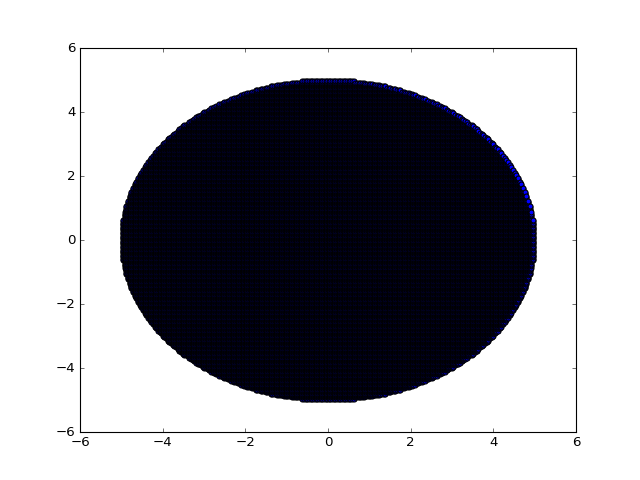

In [26]:
plt.scatter(x_lst, y_lst);

In [6]:
unit_mass = 1e-4
# xy_tups[:5]

In [7]:
I = 0

for tup in xy_tups:
    sq_dist = tup[0]**2 + tup[1]**2
    I += unit_mass*sq_dist

In [8]:
list(product(range(0,2), range(0,2), range(0, 2)))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [9]:
xy_tups_sphere = list(filter(lambda t: t[0]**2 + t[1]**2 + t[2]**2 <= 25, product(x, x, x)))

In [10]:
x_lst_sphere = [t[0] for t in xy_tups_sphere]
y_lst_sphere = [t[1] for t in xy_tups_sphere]
z_lst_sphere = [t[2] for t in xy_tups_sphere]

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_lst_sphere, y_lst_sphere, z_lst_sphere)
plt.show()

<IPython.core.display.Javascript object>

In [12]:
I = sum(map(lambda t: (t[0]**2 + t[1]**2 + t[2]**2)*unit_mass, xy_tups_sphere))

In [13]:
I

12120.111545945658

In [14]:
2*(unit_mass*len(xy_tups_sphere))*25/3

13469.04

In [15]:
xy_tups_cylinder = list(product(filter(lambda t: t[0]**2 + t[1]**2 <= 25, product(x, x)), x))

In [16]:
x_lst_cylinder = [t[0][0] for t in xy_tups_cylinder]
y_lst_cylinder = [t[0][1] for t in xy_tups_cylinder]
z_lst_cylinder = [t[1] for t in xy_tups_cylinder]

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_lst_cylinder, y_lst_cylinder, z_lst_cylinder)
plt.show()

<IPython.core.display.Javascript object>

In [18]:
I = sum(map(lambda t: (t[0][0]**2 + t[0][1]**2)*unit_mass, xy_tups_cylinder))
I

15182.695762954751

In [19]:
0.5 * (unit_mass*len(xy_tups_cylinder))*25

15200.0

In [20]:
xy_tups_rod_center = list(product(x, [0 for i in range(250)], [0 for i in range(250)]))

In [21]:
x_lst_rod_center = [x]
y_lst_rod_center = [0 for i in range(250)]
z_lst_rod_center = [0 for i in range(250)]

In [22]:
len(x)

250

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_lst_rod_center, y_lst_rod_center, z_lst_rod_center)
plt.show();

<IPython.core.display.Javascript object>

In [24]:
I = sum(map(lambda t: (t[0]**2)*unit_mass, xy_tups_rod_center))
I

13125.418340441318

In [25]:
unit_mass*len(xy_tups_rod_center)*100/12

13020.833333333334

In [26]:
x_modified = np.linspace(0, 10, 250)

In [27]:
xy_tups_rod_end = list(product(x_modified, [0 for i in range(250)], [0 for i in range(250)]))

In [28]:
x_lst_rod_end = [t[0] for t in xy_tups_rod_end]
y_lst_rod_end = [t[1] for t in xy_tups_rod_end]
z_lst_rod_end = [t[2] for t in xy_tups_rod_end]

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_modified, [0 for i in range(250)], [0 for i in range(250)])
plt.show();

<IPython.core.display.Javascript object>

In [30]:
I = sum(map(lambda t: (t[0]**2)*unit_mass, xy_tups_rod_center))
I

13125.418340441318

In [31]:
unit_mass*len(xy_tups_rod_center)*100/3

52083.333333333336

In [ ]:
y = [i for i in range(50)]

In [ ]:
xy_tups_spherewithwater = list(filter(lambda t: (t[0]-25)**2 + (t[1]-10)**2 + (t[2]-25)**2 <= 25, product(y, y, y)))

In [ ]:
x_lst_sphere = [t[0] for t in xy_tups_sphere]
y_lst_sphere = [t[1] for t in xy_tups_sphere]
z_lst_sphere = [t[2] for t in xy_tups_sphere]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_lst_sphere, y_lst_sphere, z_lst_sphere)
plt.show()

## Sphere, Water, and Air Generation

In [2]:
z = np.zeros(shape = (50, 50, 50))

In [3]:
z[:, 10:, :] = 2

In [4]:
for x in range(len(z)):
        for y in range(len(z)):
            for a in range(len(z)):
                if (x-25)**2 + (y-10)**2 + (a-25)**2 <= 25:
                    z[x, y, a] = 1

<IPython.core.display.Javascript object>


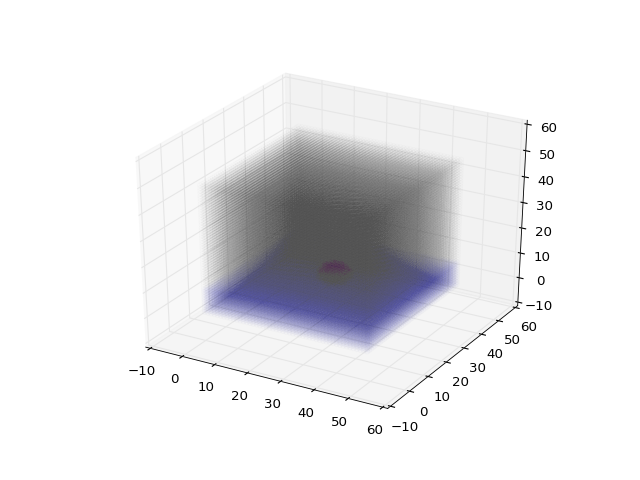

In [8]:
def plot_3d_np(matrix):
    dim = len(matrix)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.azimuth()
    ax.elev
    color_lst = []
    alpha_lst = []
    point_lst = [i for i in range(len(matrix))]
    for x in range(dim):
        for y in range(dim):
            for z in range(dim):
                color = matrix[x, y, z]
                if color == 0:
                    color_lst.append("blue")
                    alpha_lst.append(0.01)
                elif color == 1:
                    color_lst.append("brown")
                    alpha_lst.append(1)
                else:
                    color_lst.append("white")
                    alpha_lst.append(0.01)
    ax.scatter([t[0] for t in product(point_lst, point_lst, point_lst)], [t[2] for t in product(point_lst, point_lst, point_lst)], [t[1] for t in product(point_lst, point_lst, point_lst)], c = color_lst, alpha = 0.01)
    plt.show
plot_3d_np(z)

In [32]:
xy_tups_rand_sin = list(filter(lambda t: t[1]-50 < random_decimal()*np.sin(t[0]*random_integer()*t[2] - random_decimal()) \
                               and t[1]-50 < random_decimal()*np.sin(t[2]*random_integer() - random_decimal()) + random_decimal()*np.sin(t[2]*random_integer() - random_decimal()), product(x, x, x)))

NameError: name 'x' is not defined

In [43]:
"""
random_decimal()*np.sin(t[0]*random_integer() + random_decimal()) + random_decimal()*np.sin(t[0]*random_integer() - random_decimal()) - 


"""

'\nrandom_decimal()*np.sin(t[0]*random_integer() + random_decimal()) + random_decimal()*np.sin(t[0]*random_integer() - random_decimal()) - \n\n\n'

In [25]:
# xval < 0.5*np.sin(zval*2 + 0.05) + 0.25*np.sin(zval*3 - 0.05) - 0.25*np.sin(zval*3*yval - 0.05) and xval < 0.25*np.sin(yval*6 - 0.05) + 0.5*np.sin(yval*3 - 0.05)
xy_tups_rand_sin = list(filter(lambda t: t[1]-50 < 0.5*np.sin(t[0]*2 + 0.05) + 0.25*np.sin(t[0]*3 - 0.05) - 0.25*np.sin(t[0]*3*t[2] - 0.05) and t[1]-50 < 0.25*np.sin(t[2]*6 - 0.05) + 0.5*np.sin(t[2]*3 - 0.05), product(x, x, x)))

In [47]:
x_lst_sin = [t[0] for t in xy_tups_rand_sin]
y_lst_sin = [t[2] for t in xy_tups_rand_sin]
z_lst_sin = [t[1] for t in xy_tups_rand_sin]

<IPython.core.display.Javascript object>


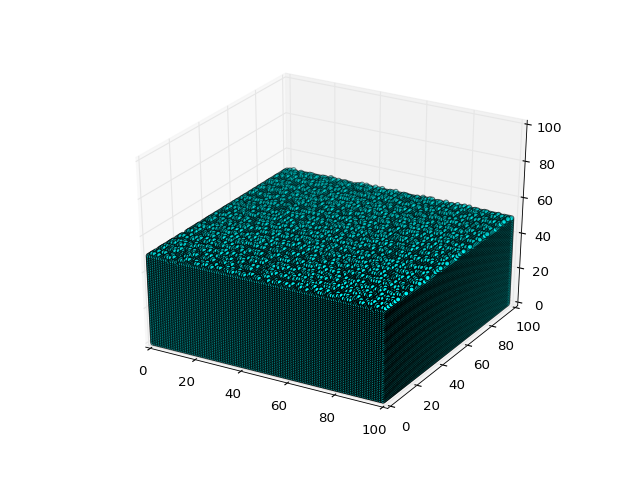

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_lst_sin, y_lst_sin, z_lst_sin, c="cyan")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.set_zlim([0, 100])
plt.show()

In [1]:
import numpy as np
z= np.random.random((10,3))
x,y = z[:,0], z[:,1]
r = np.sqrt(x**2+y**2)
t = np.arctan2(y,x)
print(r)
print(t)
plt.scatter(r, t)



[ 0.65354246  0.82735418  0.82039985  0.81617476  0.68422863  0.94065491
  0.89032838  0.6260731   1.0383882   0.53096454]
[ 1.34114136  0.55124811  0.74019258  0.58439731  0.58719509  0.59358946
  1.20476783  1.03832908  0.91104909  1.15350145]


NameError: name 'plt' is not defined

$$\sqrt{y^2+x^2}<-200+275\cos\left(\arctan\left(\frac{y}{x}\right)\right)$$
$$r<-200-275\cos\left(\theta)\right)$$

In [23]:
y = create_duck(100)

/Users/rattaluri001/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  app.launch_new_instance()
/Users/rattaluri001/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


In [25]:
duck_x = [t[0] for t in y]
duck_y = [t[2] for t in y]
duck_z = [t[1] for t in y]


<IPython.core.display.Javascript object>


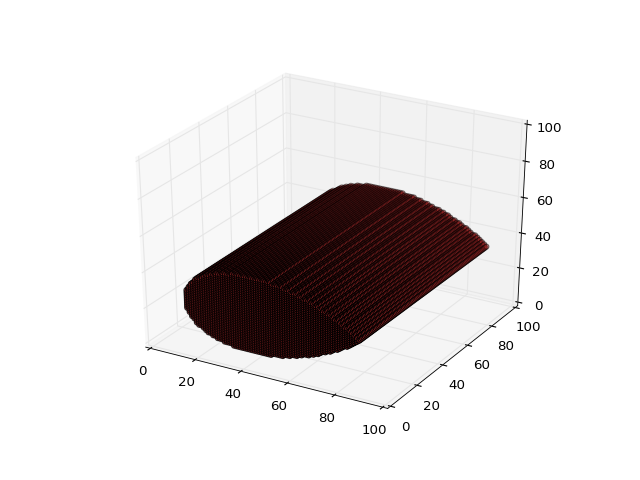

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(duck_x, duck_y, duck_z, c="brown")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.set_zlim([0, 100])
plt.show()

# Project Code

In [94]:
stress = 0

In [95]:
def plot(num_timesteps, y):
    global stress
    angularAcceleration = []
    for i in range(num_timesteps):
        stress = 0
        print(str(i+1) + ':')
        y = move_recompute(y)
        y = compute_energies(y)
# CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE
        angularAcceleration.append(stress/wedgeRotationalInertia)
    print("Angular Accelerations:")
    print(angularAcceleration)
    angularAcceleration = np.array(angularAcceleration)
    angularVelocity = np.cumsum(angularAcceleration)
    print("Angular Velocities:")
    print(angularVelocity)
    count = 0
    fig = plt.figure()
    color_lst = []
    alpha_lst = []
    x_lst = []
    y_lst = []
    z_lst = []
    for m in range(len(y)):
            for f in range(len(y)):
                for z in range(len(y)):
                    if y[m][f][z]:
                        if y[m][f][z].particletype == 'w':
                            color_lst.append("cyan")
                            alpha_lst.append(1)
                            count+=1
                            x_lst.append(m)
                            y_lst.append(f)
                            z_lst.append(z)
                        if y[m][f][z].particletype == 'r':
                            color_lst.append("brown")
                            alpha_lst.append(1)
                            x_lst.append(m)
                            y_lst.append(f)
                            z_lst.append(z)
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_lst, y_lst, z_lst, c=color_lst)
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_zlim([0, 100])
    ax.set_xlabel('X')
    ax.get_proj()
    plt.show()
    return angularVelocity

In [96]:
def random_decimal_high():
    return random.randint(11, 20)/10

In [97]:
def random_integer_high():
    return random.randint(2, 5)

In [98]:
def random_decimal_low():
    return random.randint(1, 7)/10

In [99]:
def random_integer_low():
    return random.randint(1, 2)

In [100]:
def move_recompute(part_matrix):
    dim = len(part_matrix)
    check_matrix = [[[True for x in range(dim)]for y in range(dim)]for z in range(dim)]
    for x in range(dim):
        for y in range(dim):
            for z in range(dim):
#                 print(part_matrix[0][0][0])
                if move_particle(x, y, z, part_matrix) != None:
                    if part_matrix[x][y][z]:
                        if part_matrix[x][y][z].particletype == 'w':
                            mat = move_particle(x, y, z, part_matrix)
                            if check_matrix[x][y][z] and mat != None:
                                part_matrix = mat
                                check_matrix[x][y][z] = False
    return part_matrix

In [101]:
def move_particle(x, y, z, position_matrix):
    p_init = position_matrix[x][y][z]
    if position_matrix:
        if p_init and p_init.particletype == 'w':
            newy, newz = get_new_yz(x, y, z, p_init.vy, p_init.vz)
#             print(z, newz)
            if p_init.vy > 0:
                return collide(newz, newy, z, x, y, z, position_matrix)
            elif p_init.vy < 0:
                return collide(newz, -1 * newy, z, x, y, z, position_matrix)

In [102]:
def get_new_yz(x, y, z, vy, vz):
    newy = int(y + vy)
    newz = int(x + vz)
    return newy, newz

In [103]:
def collide(xhit, yhit, zhit, x, y, z, position_matrix):
    global stress
    
    p_init = position_matrix[x][y][z]
    dim = len(position_matrix)
    if position_matrix:
            if xhit >= dim or zhit < 0 or yhit >= dim or xhit < 0 or zhit >= dim or zhit < 0:
#                 if xhit >= dim:
#                     print("yee")
                position_matrix[x][y][z] = None
            elif yhit < 0:
                p_init.vy *= -1
            elif position_matrix[xhit][yhit][zhit]:
                p_hit = position_matrix[xhit][yhit][zhit]
                if p_hit.particletype == 'w':
                    position_matrix = move_particle(xhit, yhit, zhit, position_matrix)
                    if p_hit:
                        p_init.__dict__, p_hit.__dict__ = \
                        p_hit.__dict__, p_init.__dict__
                    else:
                        p_hit.__dict__ = p_init.__dict__
                        position_matrix[x][y][z] = None
                elif p_hit.particletype == 'r':
                    movey = p_init.vy
                    movez = p_init.vz
                    p_hit.energy += 0.025 * (0.95 * math.sqrt(movey**2 + movez**2))
                    stress += add_stress(p_init)
                    position_matrix[x][y][z] = None
                elif p_hit.particletype == 'a':
                    p_init.__dict__, p_hit.__dict__ = \
                    p_hit.__dict__, p_init.__dict__
            else:
                position_matrix[xhit][yhit][zhit] = position_matrix[x][y][z]
                position_matrix[x][y][z] = None
    return position_matrix


In [104]:
def add_stress(particle):
    global stress
    return get_distance(particle.x, particle.y) * math.sqrt((particle.vy**2) + (particle.vz**2)) * math.sin(math.atan(particle.vz/particle.vy))

In [105]:
class Particle():
    def __init__(self, particletype, vy, vz, energy, x, y, z):
        self.particletype = particletype
        self.vy = vy
        self.vz = vz
        self.energy = energy
        self.x = x
        self.y = y
        self.z = z

In [106]:
def compute_energies(pmatrix):
    # Iterate through the position matrix
    # Overwrite every energy value for waters with (vz^2 + vy^2)/(40400)
    for x in pmatrix:
        for y in x:
            for z in y:
                if z:
                    if z.particletype == 'w':
                        z.energy = (z.vz^2 + z.vy^2)/(40400)
    return pmatrix

In [107]:
def get_distance(x, y):
# CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE
    return np.sqrt((50-y)**2 + (73-x)**2)

## Ducks

### Airfoil
$\sqrt{(y-50)^2+(x-10)^2}<-200+275\cos\left(\arctan\left(\frac{y-50}{x-10}\right)\right)$ and $x > 10$
### Crescent
$-0.004\left(x-60\right)^2+48<y<-0.01\left(x-60\right)^2+55$
### Paddlewheel
$(49<y<51$ and $40<x<80)$ or $(59<x<61$ and $30<y<70)$
### Wedge
$-\frac{1}{4}x+60<y<\frac{1}{4}x+40$ and $x <80$
### Rectangle
$45<y<55$ and $40<x<80$

In [108]:
def high_sin(zval, xval, yval, val):
    return zval-50 < random_decimal_high()*np.sin(xval*random_integer_high() + random_decimal_high()) + random_integer_high()*np.sin(xval*random_integer_high() - random_decimal_high()) - random_integer_high()*np.sin(xval*random_integer_high()*yval - random_decimal_high()) and zval-50 < random_decimal_high()*np.sin(yval*random_integer_high() - random_decimal_high()) + random_decimal_high()*np.sin(yval*random_integer_high() - random_decimal_high())

In [109]:
def low_sin(zval, xval, yval, val):
    return zval-50 < random_decimal_low()*np.sin(xval*random_integer_low() + random_decimal_low()) + random_integer_low()*np.sin(xval*random_integer_low() - random_decimal_low()) - random_integer_low()*np.sin(xval*random_integer_low()*yval - random_decimal_low()) and zval-50 < random_decimal_low()*np.sin(yval*random_integer_low() - random_decimal_low()) + random_decimal_low()*np.sin(yval*random_integer_low() - random_decimal_low())

In [110]:
def find_duckmat_airfoil(zval, xval, yval, val, high):
    if xval != 10:
        if (np.sqrt((xval - 10)**2 + (zval - 50)**2) < 275 * np.cos(np.arctan((zval - 50) / (xval - 10))) - 200) and xval > 10:
            return 'r'
    if (high and high_sin(zval, xval, yval, val)) or (not high and low_sin(zval, xval, yval, val)):
        return 'w'
    return 'a'
def find_duckmat_crescent(zval, xval, yval, val, high):
    if (-0.004*(xval - 60)**2+48<zval) and zval<-0.01*(xval - 60)**2+55:
        return 'r'
    if (high and high_sin(zval, xval, yval, val)) or (not high and low_sin(zval, xval, yval, val)):
        return 'w'
    return 'a'
def find_duckmat_paddlewheel(zval, xval, yval, val, high):
    if (54<zval<56 and 40<xval<80) or (59<xval<61 and 35<zval<75):
        return 'r'
    if (high and high_sin(zval, xval, yval, val)) or (not high and low_sin(zval, xval, yval, val)):
        return 'w'
    return 'a'
def find_duckmat_wedge(zval, xval, yval, val, high):
    if -1/4*xval+60<zval<1/4*xval+40 and xval<80:
        return 'r'
    if (high and high_sin(zval, xval, yval, val)) or (not high and low_sin(zval, xval, yval, val)):
        return 'w'
    return 'a'
def find_duckmat_rectangle(zval, xval, yval, val, high):
    if 45<zval<55 and 40<xval<80:
        return 'r'
    if (high and high_sin(zval, xval, yval, val)) or (not high and low_sin(zval, xval, yval, val)):
        return 'w'
    return 'a'

In [111]:
def energyval(flag):
    if flag == "w":
        return random.randint(1, 100)
    elif flag == "r":
        return -1
    else:
        return 0

In [112]:
def create_duck_high(dim):
    # CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE
    matrix = [[[Particle(find_duckmat_crescent(x, y, z, dim, True), int(round(random.uniform(-5, -2))), int(round(random.uniform(3, 6)))\
        , energyval(find_duckmat_crescent(x, y, z, dim, True)), z, y, x) for x in range(dim)]for y in range(dim)] for z in range(dim)]
    return matrix
def create_duck_low(dim):
    # CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE BETWEEN RUNS | CHANGE
    matrix = [[[Particle(find_duckmat_airfoil(x, y, z, dim, False), int(round(random.uniform(-5, -2))), int(round(random.uniform(2, 5)))\
        , energyval(find_duckmat_airfoil(x, y, z, dim, False)), z, y, x) for x in range(dim)]for y in range(dim)] for z in range(dim)]
    return matrix

In [128]:
ting = create_duck_high(100)

1:
2:
3:
4:
5:
6:
7:
8:
9:
10:
11:
12:
13:
14:
15:
Angular Accelerations:
[1.8515875577896921, 1.2066651288980359, 0.7590933919388676, 0.55231174395610072, 0.4216733603239749, 0.30258582646435445, 0.23037854917913883, 0.13945336476206782, 0.057714059499457869, 0.0092788783481984882, 0.00072948866009472306, 0.0, 0.0, 0.0, 0.0]
Angular Velocities:
[ 1.85158756  3.05825269  3.81734608  4.36965782  4.79133118  5.09391701
  5.32429556  5.46374892  5.52146298  5.53074186  5.53147135  5.53147135
  5.53147135  5.53147135  5.53147135]


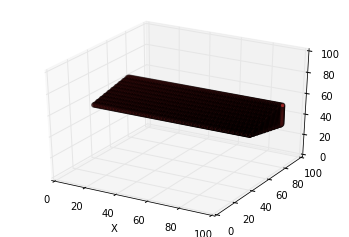

In [215]:
ting = create_duck_high(100)
angularVelocitiesWedgeHigh = plot(15, ting)

1:
2:
3:
4:
5:
6:
7:
8:
9:
10:
11:
12:
13:
14:
15:
Angular Accelerations:
[1.1080482871172157, 0.69502010738099906, 0.45727117048294791, 0.34495710442674982, 0.27588092806214304, 0.21442498080801273, 0.1680030138409648, 0.12257543843059861, 0.068994271341397809, 0.024696949820817549, 0.0018085907322650189, 0.0, 0.0, 0.0, 0.0]
Angular Velocities:
[ 1.10804829  1.80306839  2.26033956  2.60529667  2.8811776   3.09560258
  3.26360559  3.38618103  3.4551753   3.47987225  3.48168084  3.48168084
  3.48168084  3.48168084  3.48168084]


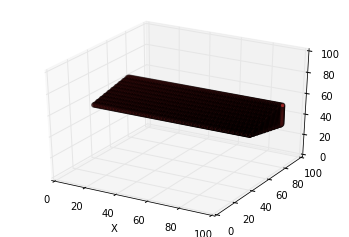

In [293]:
ting = create_duck_low(100)
angularVelocitiesWedgeLow = plot(15, ting)

In [292]:
wedgeRotationalInertia = 0
for yet in ting:
    for yoooo in yet:
        for zed in yoooo:
            if zed:
                if zed.particletype == 'r':
                    wedgeRotationalInertia += get_distance(zed.x, zed.y)
wedgeRotationalInertia

1423912.360134186

## Energy Generation Formula
$O(t) = \frac{1}{2}\delta N^\beta I \omega(t)^2$

$\delta = 0.7$

$N = 1$

$\beta = 1$

The equation can be simplified to $0.35 I \omega(t)^2$

In [26]:
def gen_energy(angularVelocity, rotationalInertia):
    return 0.5 * 0.7 * rotationalInertia * (angularVelocity ** 2)

In [232]:
gen_energy(angularVelocitiesAirfoilHigh, airfoilRotationalInertia)

array([  360270.03549755,  1132834.87892291,  1819960.9358361 ,
        2357319.48172006,  2694730.21719676,  2856217.09574099,
        2910714.34732794,  2920909.98990912,  2921158.59948483,
        2921158.59948483,  2921158.59948483,  2921158.59948483,
        2921158.59948483,  2921158.59948483,  2921158.59948483])

In [233]:
gen_energy(angularVelocitiesAirfoilLow, airfoilRotationalInertia)

array([  234814.79907791,   732347.72694558,  1194977.15710392,
        1584314.61026038,  1843904.81302789,  1979753.51483873,
        2032571.40751621,  2047460.87868036,  2048337.99831502,
        2048337.99831502,  2048337.99831502,  2048337.99831502,
        2048337.99831502,  2048337.99831502,  2048337.99831502])

In [234]:
gen_energy(angularVelocitiesCrescentHigh, crescentRotationalInertia)

array([  837039.36766531,  2404016.80937535,  3748813.01945704,
        4885115.97338794,  5793267.06401405,  6320654.22261939,
        6529465.71712363,  6605100.19483925,  6634674.43255566,
        6637117.87601529,  6637117.87601529,  6637117.87601529,
        6637117.87601529,  6637117.87601529,  6637117.87601529])

In [235]:
gen_energy(angularVelocitiesCrescentLow, crescentRotationalInertia)

array([  546958.50729837,  1550563.09356805,  2459053.89129885,
        3266562.82591621,  3941964.95451739,  4385474.55382303,
        4581973.9197875 ,  4678660.42198974,  4713770.21056188,
        4721520.82877661,  4721520.82877661,  4721520.82877661,
        4721520.82877661,  4721520.82877661,  4721520.82877661])

In [236]:
gen_energy(angularVelocitiesPaddlewheelHigh, paddlewheelRotationalInertia)

array([  2279278.8774458 ,   7986001.73810192,  13189404.61270022,
        17442933.57828171,  21088073.74820213,  23765201.30086143,
        25705350.75720689,  27007504.19147314,  27632653.75091757,
        27761932.93791668,  27761932.93791668,  27761932.93791668,
        27761932.93791668,  27761932.93791668,  27761932.93791668])

In [237]:
gen_energy(angularVelocitiesPaddlewheelLow, paddlewheelRotationalInertia)

array([  1775730.00683587,   6123835.92334502,  10062947.93227009,
        13453664.29566002,  16250223.36950786,  18452823.38402565,
        20326280.71073804,  21735027.92934746,  22613879.37598065,
        22965957.40803975,  22978819.88987118,  22978819.88987118,
        22978819.88987118,  22978819.88987118,  22978819.88987118])

In [238]:
gen_energy(angularVelocitiesRectangleHigh, rectangleRotationalInertia)

array([  38338.16800373,  106658.66734055,  160671.70269842,
        209872.40300197,  248118.96833055,  273462.25045907,
        283412.83720548,  285053.94359847,  285053.94359847,
        285053.94359847,  285053.94359847,  285053.94359847,
        285053.94359847,  285053.94359847,  285053.94359847])

In [239]:
gen_energy(angularVelocitiesRectangleLow, rectangleRotationalInertia)

array([  25421.29359938,   69225.51300157,  106009.28811848,
        140136.01374948,  168440.42284098,  190792.72283285,
        201549.5303846 ,  204028.59857184,  204102.26643262,
        204102.26643262,  204102.26643262,  204102.26643262,
        204102.26643262,  204102.26643262,  204102.26643262])

In [240]:
gen_energy(angularVelocitiesWedgeHigh, wedgeRotationalInertia)

array([  1708597.67784688,   4661203.20191673,   7262303.14740402,
         9515818.8023679 ,  11440992.10746316,  12931682.53694046,
        14127835.05128732,  14877596.36903547,  15193563.10661764,
        15244671.90975096,  15248693.63015148,  15248693.63015148,
        15248693.63015148,  15248693.63015148,  15248693.63015148])

In [241]:
gen_energy(angularVelocitiesWedgeLow, wedgeRotationalInertia)

array([  1148211.83445045,   3077392.75912762,   4818747.87105679,
         6408464.23590768,   7881394.93058894,   9137171.43209864,
        10190761.20305574,  10921188.83691729,  11390177.44762613,
        11550826.23316753,  11565793.41332506,  11565793.41332506,
        11565793.41332506,  11565793.41332506,  11565793.41332506])

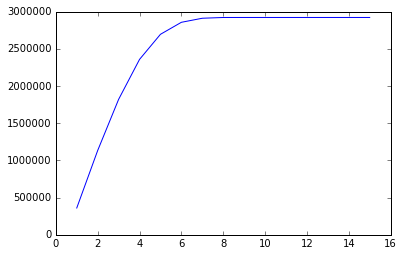

In [245]:
x=[i+1 for i in range(15)]
plt.plot(x, gen_energy(angularVelocitiesAirfoilHigh, airfoilRotationalInertia))

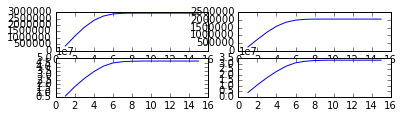

In [249]:
plt.subplot(5, 2, 1)
plt.plot(x, gen_energy(angularVelocitiesAirfoilHigh, airfoilRotationalInertia))
plt.subplot(5, 2, 2)
plt.plot(x, gen_energy(angularVelocitiesAirfoilLow, airfoilRotationalInertia))
plt.subplot(5, 2, 3)
plt.plot(x, gen_energy(angularVelocitiesCrescentHigh, airfoilRotationalInertia))
plt.subplot(5, 2, 4)
plt.plot(x, gen_energy(angularVelocitiesCrescentLow, airfoilRotationalInertia))

In [33]:
energiesAirfoilHigh = np.array([  360270.03549755,  1132834.87892291,  1819960.9358361 ,
        2357319.48172006,  2694730.21719676,  2856217.09574099,
        2910714.34732794,  2920909.98990912,  2921158.59948483,
        2921158.59948483,  2921158.59948483,  2921158.59948483,
        2921158.59948483,  2921158.59948483,  2921158.59948483])
energiesAirfoilLow = np.array([  234814.79907791,   732347.72694558,  1194977.15710392,
        1584314.61026038,  1843904.81302789,  1979753.51483873,
        2032571.40751621,  2047460.87868036,  2048337.99831502,
        2048337.99831502,  2048337.99831502,  2048337.99831502,
        2048337.99831502,  2048337.99831502,  2048337.99831502])
energiesCrescentLow = np.array([  837039.36766531,  2404016.80937535,  3748813.01945704,
        4885115.97338794,  5793267.06401405,  6320654.22261939,
        6529465.71712363,  6605100.19483925,  6634674.43255566,
        6637117.87601529,  6637117.87601529,  6637117.87601529,
        6637117.87601529,  6637117.87601529,  6637117.87601529])
energiesCrescentHigh = np.array([  546958.50729837,  1550563.09356805,  2459053.89129885,
        3266562.82591621,  3941964.95451739,  4385474.55382303,
        4581973.9197875 ,  4678660.42198974,  4713770.21056188,
        4721520.82877661,  4721520.82877661,  4721520.82877661,
        4721520.82877661,  4721520.82877661,  4721520.82877661])
energiesPaddlewheelHigh = np.array([  2279278.8774458 ,   7986001.73810192,  13189404.61270022,
        17442933.57828171,  21088073.74820213,  23765201.30086143,
        25705350.75720689,  27007504.19147314,  27632653.75091757,
        27761932.93791668,  27761932.93791668,  27761932.93791668,
        27761932.93791668,  27761932.93791668,  27761932.93791668])
energiesPaddlewheelLow = np.array([  1775730.00683587,   6123835.92334502,  10062947.93227009,
        13453664.29566002,  16250223.36950786,  18452823.38402565,
        20326280.71073804,  21735027.92934746,  22613879.37598065,
        22965957.40803975,  22978819.88987118,  22978819.88987118,
        22978819.88987118,  22978819.88987118,  22978819.88987118])
energiesRectangleHigh = np.array([  38338.16800373,  106658.66734055,  160671.70269842,
        209872.40300197,  248118.96833055,  273462.25045907,
        283412.83720548,  285053.94359847,  285053.94359847,
        285053.94359847,  285053.94359847,  285053.94359847,
        285053.94359847,  285053.94359847,  285053.94359847])
energiesRectangleLow = np.array([  25421.29359938,   69225.51300157,  106009.28811848,
        140136.01374948,  168440.42284098,  190792.72283285,
        201549.5303846 ,  204028.59857184,  204102.26643262,
        204102.26643262,  204102.26643262,  204102.26643262,
        204102.26643262,  204102.26643262,  204102.26643262])
energiesWedgeHigh = np.array([  1708597.67784688,   4661203.20191673,   7262303.14740402,
         9515818.8023679 ,  11440992.10746316,  12931682.53694046,
        14127835.05128732,  14877596.36903547,  15193563.10661764,
        15244671.90975096,  15248693.63015148,  15248693.63015148,
        15248693.63015148,  15248693.63015148,  15248693.63015148])
energiesWedgeLow = np.array([  1148211.83445045,   3077392.75912762,   4818747.87105679,
         6408464.23590768,   7881394.93058894,   9137171.43209864,
        10190761.20305574,  10921188.83691729,  11390177.44762613,
        11550826.23316753,  11565793.41332506,  11565793.41332506,
        11565793.41332506,  11565793.41332506,  11565793.41332506])

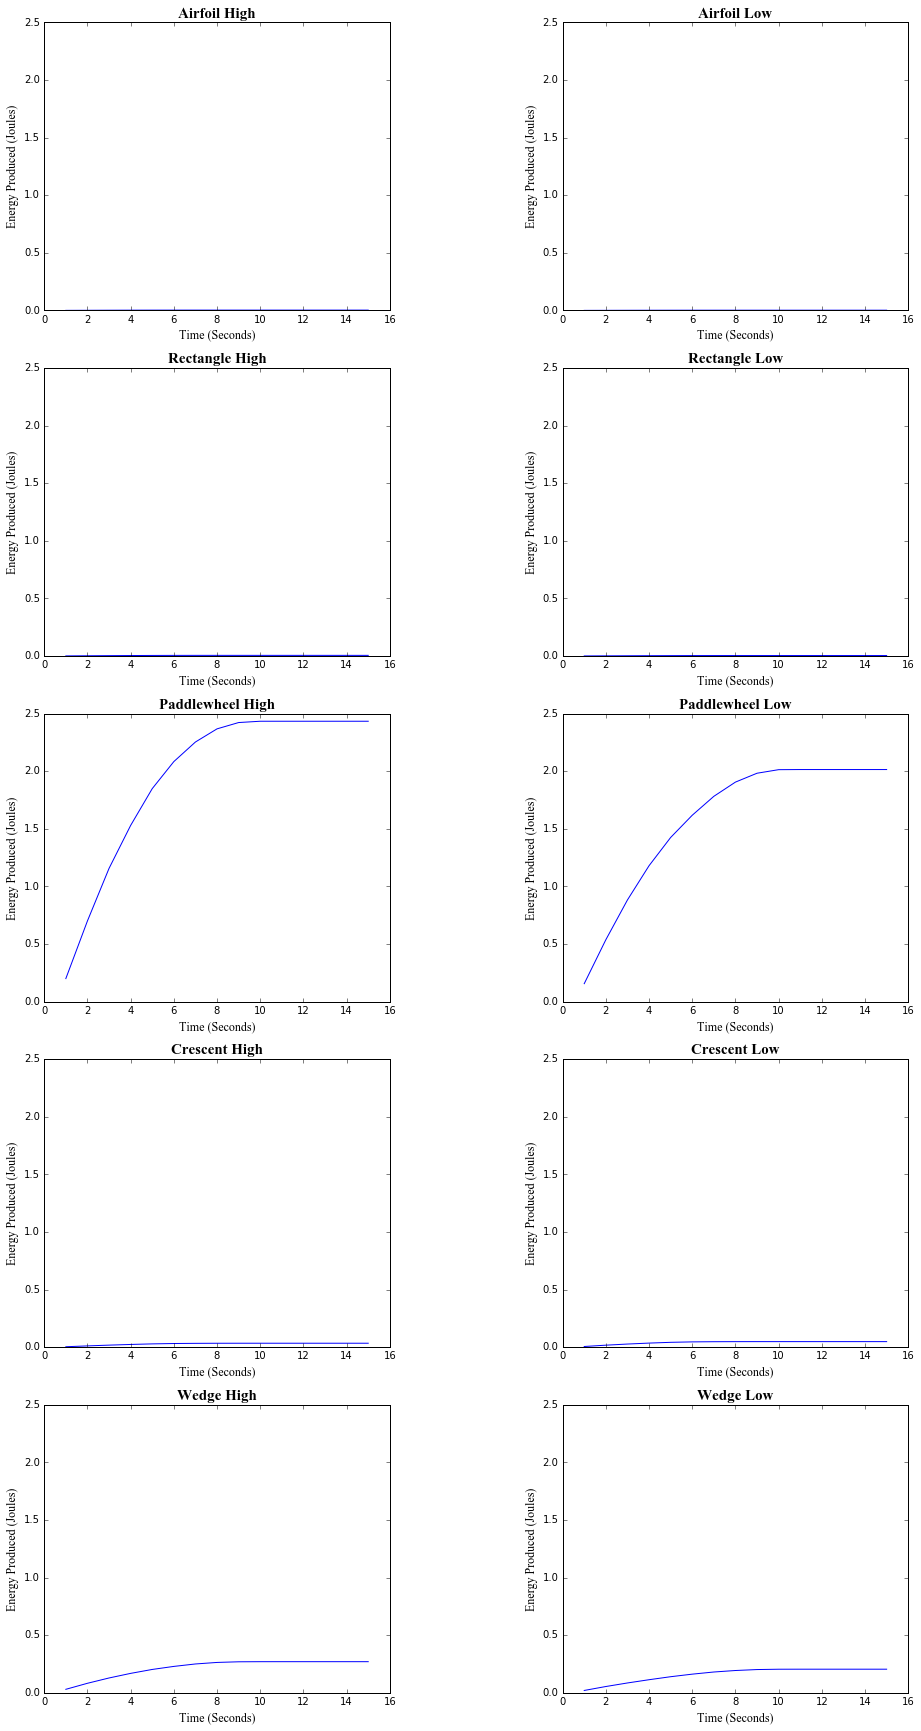

In [119]:
fig = plt.figure(dpi=2500)

axes1 = fig.add_axes([0.1, 0.1, 0.8, 1])
axes1.set_ylim([0, 2.5])
axes1.plot(x, energiesAirfoilHigh)
axes1.set_title("Airfoil High", fontname='Times New Roman', fontsize=15)
ttl = axes1.title
ttl.set_weight('bold')
axes1.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes1.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)
axes2 = fig.add_axes([1.3, 0.1, 0.8, 1])
axes2.set_ylim([0, 2.5])
axes2.plot(x, energiesAirfoilLow)
axes2.set_title("Airfoil Low", fontname='Times New Roman', fontsize=15)
ttl = axes2.title
ttl.set_weight('bold')
axes2.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes2.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)
axes3 = fig.add_axes([0.1, -3.5, 0.8, 1])
axes3.set_ylim([0, 2.5])
axes3.plot(x, energiesCrescentHigh)
axes3.set_title("Crescent High", fontname='Times New Roman', fontsize=15)
ttl = axes3.title
ttl.set_weight('bold')
axes3.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes3.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)
axes4 = fig.add_axes([1.3, -3.5, 0.8, 1])
axes4.set_ylim([0, 2.5])
axes4.plot(x, energiesCrescentLow)
axes4.set_title("Crescent Low", fontname='Times New Roman', fontsize=15)
ttl = axes4.title
ttl.set_weight('bold')
axes4.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes4.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)
axes5 = fig.add_axes([0.1, -2.3, 0.8, 1])
axes5.set_ylim([0, 2.5])
axes5.plot(x, energiesPaddlewheelHigh)
axes5.set_title("Paddlewheel High", fontname='Times New Roman', fontsize=15)
ttl = axes5.title
ttl.set_weight('bold')
axes5.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes5.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)
axes6 = fig.add_axes([1.3, -2.3, 0.8, 1])
axes6.set_ylim([0, 2.5])
axes6.plot(x, energiesPaddlewheelLow)
axes6.set_title("Paddlewheel Low", fontname='Times New Roman', fontsize=15)
ttl = axes6.title
ttl.set_weight('bold')
axes6.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes6.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)
axes7 = fig.add_axes([0.1, -1.1, 0.8, 1])
axes7.set_ylim([0, 2.5])
axes7.plot(x, energiesRectangleHigh)
axes7.set_title("Rectangle High", fontname='Times New Roman', fontsize=15)
ttl = axes7.title
ttl.set_weight('bold')
axes7.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes7.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)
axes8 = fig.add_axes([1.3, -1.1, 0.8, 1])
axes8.set_ylim([0, 2.5])
axes8.plot(x, energiesRectangleLow)
axes8.set_title("Rectangle Low", fontname='Times New Roman', fontsize=15)
ttl = axes8.title
ttl.set_weight('bold')
axes8.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes8.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)
axes9 = fig.add_axes([0.1, -4.7, 0.8, 1])
axes9.set_ylim([0, 2.5])
axes9.plot(x, energiesWedgeHigh)
axes9.set_title("Wedge High", fontname='Times New Roman', fontsize=15)
ttl = axes9.title
ttl.set_weight('bold')
axes9.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes9.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)
axes10 = fig.add_axes([1.3, -4.7, 0.8, 1])
axes10.set_ylim([0, 2.5])
axes10.plot(x, energiesWedgeLow)
axes10.set_title("Wedge Low", fontname='Times New Roman', fontsize=15)
ttl = axes10.title
ttl.set_weight('bold')
axes10.set_xlabel("Time (Seconds)", fontname='Times New Roman', fontsize=12)
axes10.set_ylabel("Energy Produced (Joules)", fontname='Times New Roman', fontsize=12)

In [28]:
energiesAirfoilLow

array([  234814.79907791,   732347.72694558,  1194977.15710392,
        1584314.61026038,  1843904.81302789,  1979753.51483873,
        2032571.40751621,  2047460.87868036,  2048337.99831502,
        2048337.99831502,  2048337.99831502,  2048337.99831502,
        2048337.99831502,  2048337.99831502,  2048337.99831502])

In [34]:
x = np.linspace(1, 15, 15)

In [35]:
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.])

In [36]:
def findMass(matrix):
    duckParticles = 0
    for adasdf in matrix:
        for yeee in adasdf:
            for yeeter in yeee:
                if yeeter.particletype == 'r':
                    duckParticles += 1
    return duckParticles

In [37]:

airfoilMass = 222800

In [38]:

crescentMass = 32000

In [39]:

paddlewheelMass = 7700

In [40]:

wedgeMass = 38100

In [41]:

rectangleMass = 35100

In [42]:
airfoilMassCorrection = 3/airfoilMass
crescentMassCorrection = 3/crescentMass
paddlewheelMassCorrection = 3/paddlewheelMass
wedgeMassCorrection = 3/wedgeMass
rectangleMassCorrection = 3/rectangleMass

In [43]:
airfoilLength = 75
crescentLength = 68
paddlewheelLength = 40
wedgeLength = 40
rectangleLength = 40

In [44]:
airfoilLengthCorrection = 0.3/airfoilLength
crescentLengthCorrection = 0.3/crescentLength
paddlewheelLengthCorrection = 0.3/paddlewheelLength
wedgeLengthCorrection = 0.3/wedgeLength
rectangleLengthCorrection = 0.3/rectangleLength

In [45]:
energiesAirfoilHigh *= airfoilMassCorrection * airfoilLengthCorrection**2 * 4
energiesAirfoilLow *= airfoilMassCorrection * airfoilLengthCorrection**2 * 4

energiesCrescentHigh *= crescentMassCorrection * crescentLengthCorrection**2 * 4
energiesCrescentLow *= crescentMassCorrection * crescentLengthCorrection**2 * 4

energiesPaddlewheelHigh *= paddlewheelMassCorrection * paddlewheelLengthCorrection**2 * 4
energiesPaddlewheelLow *= paddlewheelMassCorrection * paddlewheelLengthCorrection**2 * 4

energiesWedgeHigh *= wedgeMassCorrection * wedgeLengthCorrection**2 * 4
energiesWedgeLow *= wedgeMassCorrection * wedgeLengthCorrection**2 * 4

energiesRectangleHigh *= rectangleMassCorrection * rectangleLengthCorrection**2 * 4
energiesRectangleLow *= rectangleMassCorrection * rectangleLengthCorrection**2 * 4

In [116]:
def plot_duck(x):
    x_lst = []
    y_lst = []
    z_lst = []
    for m in range(x):
            for f in range(x):
                for z in range(x):
                    if find_duckmat_airfoil(z, f, m, x, False) == 'r':
                        x_lst.append(m)
                        y_lst.append(f)
                        z_lst.append(z)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_lst, y_lst, z_lst, c="brown")
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_zlim([0, 100])
    ax.get_proj()
    plt.show()
def plot_duck2(x):
    x_lst = []
    y_lst = []
    z_lst = []
    for m in range(x):
            for f in range(x):
                for z in range(x):
                    if find_duckmat_rectangle(z, f, m, x, False) == 'r':
                        x_lst.append(m)
                        y_lst.append(f)
                        z_lst.append(z)
    fig = plt.figure(dpi=2000)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_lst, y_lst, z_lst, c="brown")
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_zlim([0, 100])
    ax.get_proj()
    plt.show()
def plot_duck3(x):
    x_lst = []
    y_lst = []
    z_lst = []
    for m in range(x):
            for f in range(x):
                for z in range(x):
                    if find_duckmat_paddlewheel(z, f, m, x, False) == 'r':
                        x_lst.append(m)
                        y_lst.append(f)
                        z_lst.append(z)
    fig = plt.figure(dpi=140)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_lst, y_lst, z_lst, c="brown")
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_zlim([0, 100])
    ax.get_proj()
    plt.show()
def plot_duck4(x):
    x_lst = []
    y_lst = []
    z_lst = []
    for m in range(x):
            for f in range(x):
                for z in range(x):
                    if find_duckmat_crescent(z, f, m, x, False) == 'r':
                        x_lst.append(m)
                        y_lst.append(f)
                        z_lst.append(z)
    fig = plt.figure(dpi=140)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_lst, y_lst, z_lst, c="brown")
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_zlim([0, 100])
    ax.get_proj()
    plt.show()
def plot_duck5(x):
    x_lst = []
    y_lst = []
    z_lst = []
    for m in range(x):
            for f in range(x):
                for z in range(x):
                    if find_duckmat_wedge(z, f, m, x, False) == 'r':
                        x_lst.append(m)
                        y_lst.append(f)
                        z_lst.append(z)
    fig = plt.figure(dpi=140)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_lst, y_lst, z_lst, c="brown")
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_zlim([0, 100])
    ax.get_proj()
    plt.show()

<IPython.core.display.Javascript object>


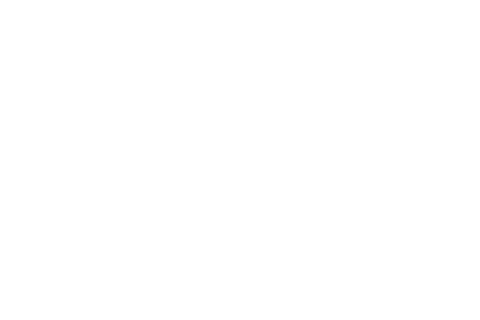

<IPython.core.display.Javascript object>


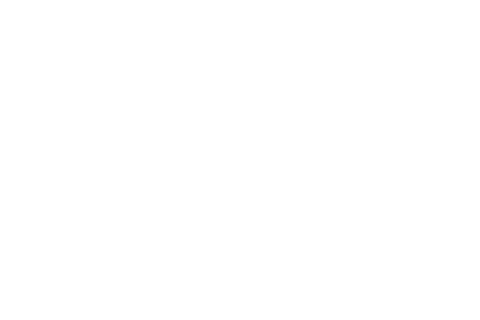

In [88]:
plt.plot([123], [234])

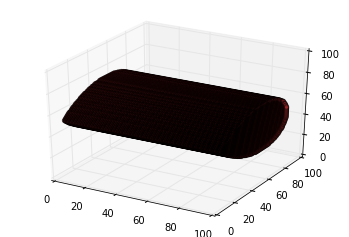

In [117]:
plot_duck(100)

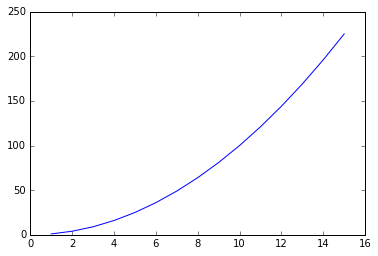

In [92]:
plt.plot(x, x**2)